In [1]:
import casadi as ca
import numpy as np

import matplotlib as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
Nx = 2
N_iter = 100
x_lim = 100
y_lim = 10
delta = 1

x_init = ca.DM([10,10])

diag_1 = 1
diag_2 = 10
x_SX = ca.SX.sym('x',Nx)
Hq = ca.diag([diag_1,diag_2])
f = x_SX.T @ Hq @ x_SX

H,g = ca.hessian(f,x_SX)

grad_func = ca.Function("grad_func", [x_SX],[g])
hessian_func = ca.Function("hessian_func", [x_SX],[H])

Steepst descent method:

$\min_{p} p^{T} \nabla f_k$ -> $p = -\nabla f_k / \|\nabla f_k \|$

In [3]:
p_steepst = - g / ca.norm_2(g) 
p_steepst_func = ca.Function("p_steepst_func",[x_SX],[p_steepst])
x = x_init
x_list = []

for i in range(N_iter):
    x_list += x.full().flatten().tolist()
    p = p_steepst_func(x)
    x += p

In [4]:
len(x_list)

200

In [5]:
# x_list

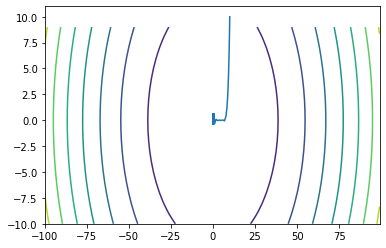

In [6]:
x = np.arange(-x_lim, x_lim, delta)
y = np.arange(-y_lim, y_lim, delta)
X, Y = np.meshgrid(x, y)
Z = diag_1 * X **2 + diag_2 * Y ** 2

fig, ax = plt.subplots()
x1 = x_list[::2]
x2 = x_list[1::2]
ax.plot(x1,x2)
CS = ax.contour(X, Y, Z)

Newton Method:
minimize: $f(x_k + p) \approx f_k + p^{T} \nabla f_k + \frac{1}{2} \nabla^{2} f_k p$ -> $p_k = - (\nabla^{2}f_k)^{-1} \nabla f_k$

In [7]:
p_newton = - ca.inv(H) @ g
p_newton

SX(@1=10, [(-0.5*(x_0+x_0)), (-0.05*((@1*x_1)+(@1*x_1)))])

In [8]:
p_newton = - ca.inv(H) @ g
p_newton_func = ca.Function("p_newton_func",[x_SX],[p_newton])
x = x_init
x_list = []

for i in range(N_iter):
    x_list += x.full().flatten().tolist()
    p = p_newton_func(x)
    x += 0.9 * p

Fast rate of local convergence for quadratic problem.

In [9]:
# x_list

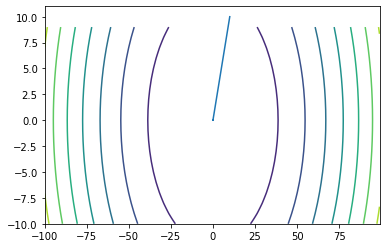

In [10]:
x = np.arange(-x_lim, x_lim, delta)
y = np.arange(-y_lim, y_lim, delta)
X, Y = np.meshgrid(x, y)
Z = diag_1 * X **2 + diag_2 * Y ** 2

fig, ax = plt.subplots()
x1 = x_list[::2]
x2 = x_list[1::2]
ax.plot(x1,x2)
CS = ax.contour(X, Y, Z)

Quasi-Newton

Derived from $\nabla f(x+p) = \nabla f(x) + \int^{1}_0 f(x+tp)p dt$ -> $\nabla ^{2} f_k (x_{k+1} - x_k) \approx \nabla f_{k+1} - \nabla f_k$

We then have the secant equation: $B_{k+1} s_k = y_k$, where $s_k = x_{k+1} - x_k, \quad y_k = \nabla f_{k+1} - \nabla f_k$

Update rule: $p_{k}=-H_{k} \nabla f_{k}$, where $H_{k} \stackrel{\text { def }}{=} B_{k}^{-1}$ and $H_{k+1}=\left(I-\rho_{k} s_{k} y_{k}^{T}\right) H_{k}\left(I-\rho_{k} y_{k} s_{k}^{T}\right)+\rho_{k} s_{k} s_{k}^{T}, \quad \rho_{k}=\frac{1}{y_{k}^{T} s_{k}}$.

### BFGS method

In [11]:
H_0 = ca.inv(Hq) / 2
H_k = H_0
x_k = x_init
x_list = []

alpha = 0.9 # Should be computed from a line search.
I = ca.diag([1,1])

for i in range(N_iter):
    x_list += x_k.full().flatten().tolist()
    grad_k = grad_func(x_k)
#     print(grad_k)
    p = - H_k @ grad_k
    # TODO: line search to satisfy the Wolfe conditions
    x_plus = x_k + p * alpha
    grad_plus = grad_func(x_plus)
    
    sk = x_plus - x_k
    yk = grad_plus - grad_k
    rho_k = 1 / (yk.T @ sk) 
    H_k = (I - rho_k * sk @ yk.T) @ H_k @ ( I - rho_k * sk @ yk.T) + rho_k @ sk @ sk.T
    x_k = x_plus



In [12]:
# x_list

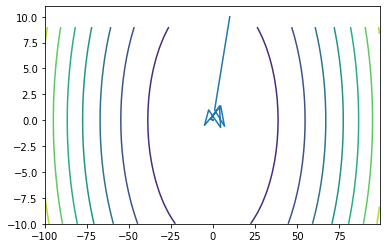

In [13]:
x = np.arange(-x_lim, x_lim, delta)
y = np.arange(-y_lim, y_lim, delta)
X, Y = np.meshgrid(x, y)
Z = diag_1 * X **2 + diag_2 * Y ** 2

fig, ax = plt.subplots()
x1 = x_list[::2]
x2 = x_list[1::2]
ax.plot(x1,x2)
CS = ax.contour(X, Y, Z)